In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [5]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


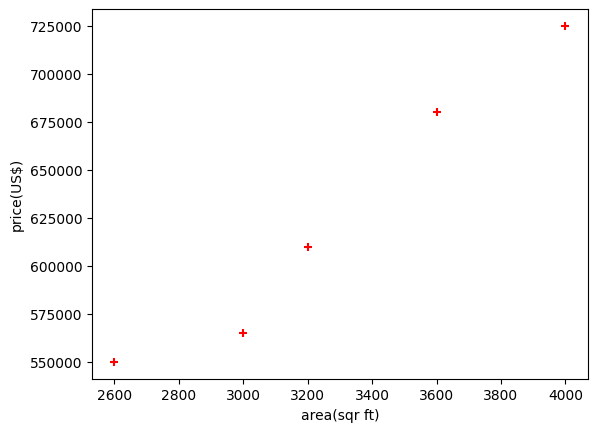

In [6]:
%matplotlib inline 
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [7]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df['price'])



LinearRegression()

In [8]:
reg.predict(pd.DataFrame([[3300]],columns=['area']))

array([628715.75342466])

In [9]:
reg.coef_

array([135.78767123])

In [10]:
reg.intercept_

np.float64(180616.43835616432)

In [11]:
d = pd.read_csv("areas.csv")

In [12]:
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [13]:
reg.predict(d)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [14]:
p = reg.predict(d)

In [15]:
d['prices'] = p

In [16]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [17]:
d.to_csv('prediction.csv',index=False)

In [19]:
import pickle

In [21]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [22]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)


In [23]:
mp

LinearRegression()

In [26]:
mp.predict(pd.DataFrame([[5000]],columns=['area']))

array([859554.79452055])

In [28]:
import joblib

In [29]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [30]:
mj = joblib.load('model_joblib')

In [31]:
mj.predict(pd.DataFrame([[5000]],columns=['area']))

array([859554.79452055])

In [32]:
mj.coef_

array([135.78767123])